In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
# chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

import TMQGP as tm
import QuarkTM

import matplotlib
matplotlib.style.use('publication')
import os

import h5py

from numpy import *

/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
murange = array([0, 0.2, 0.4])

In [4]:
folder = '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/'

In [5]:
fnames = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5']#, '0.60/data.hdf5']


In [6]:
# folder2 = '/home/const/Numerics/TMQGP/ipy/TMQGP/test/Expand/4ch_LO_data/'
folder2 = '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/'

In [7]:
fnames2 = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5']#, '0.60/data.hdf5']
# 
# fnames2 = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [8]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [9]:
dfs2 = [h5py.File(folder2+fname) for fname in fnames2] 

In [10]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [11]:
erange = dfs[0]['170'].attrs['erange']
erange2 = dfs2[0]['170'].attrs['erange']

qrange1 = dfs[0]['170'].attrs['qrange']
qrange2 = dfs2[0]['170'].attrs['qrange']

In [12]:
GG0 = array(dfs[0]['170']['Q']['G'])

In [13]:
GG = array(dfs[2]['170']['Q']['G'])

In [14]:
GG2 = array(dfs2[2]['170']['Q']['G'])

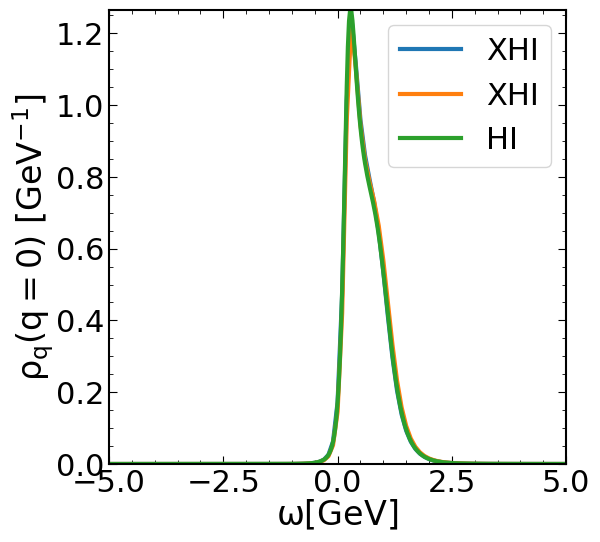

In [15]:
plt.plot(erange, -imag(GG[:,0])/pi, label='XHI')
plt.plot(erange, -imag(GG0[:,0])/pi, label='XHI')
plt.plot(erange2, -imag(GG2[:,0])/pi, label='HI')
# plt.plot(erange3, -imag(GG3[:,0]), ls='--')

plt.ylabel(r'$\rho_q(q = 0)$ [GeV$^{-1}$]')
plt.xlabel('$\omega [GeV]$')
# plt.semilogy()

plt.legend()

# plt.savefig('rho_q_log.pdf', bbox_inches='tight')

In [16]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

Ps_mu = array(Ps_mu)

/tmp/ipykernel_71886/3111885847.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [17]:
Ps_mu2 = []

for df in dfs2:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu2 += [Ps]

Ps_mu2 = array(Ps_mu2)

/tmp/ipykernel_71886/2035621139.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


(0.0, 0.25)

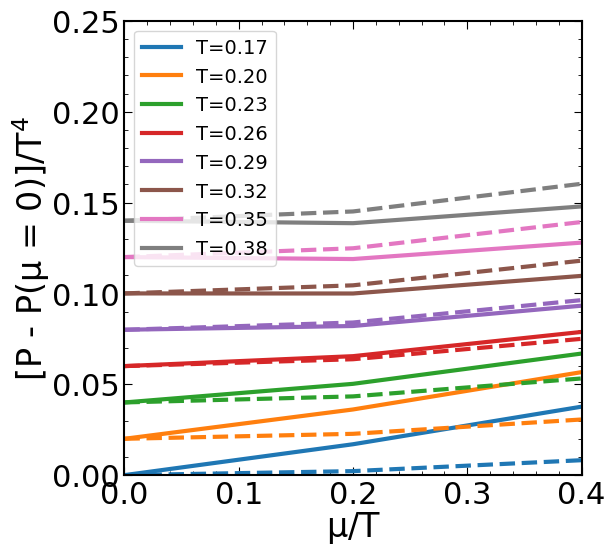

In [18]:

lines = []
for _ in range(8):
    T = Trange[_]
        
    shift = 0.02*_
    l, = plt.plot(murange, shift + (Ps_mu[:, _] - Ps_mu[0, _])/T**4, label='T=%.2f'%(T))
    l2, = plt.plot(murange, shift + (Ps_mu2[:, _] - Ps_mu2[0, _])/T**4, ls='--', c=l.get_c())

    lines += [l]
    # plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    
    # chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('[P - P($\mu$ = 0)]/T$^4$')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

# leg = plt.legend(lines, ['%.2f'%T for T in Trange], bbox_to_anchor = [1.2, 1.05], loc='upper right')
# plt.gca().add_artist(leg)

# plt.legend([l, l2], ['XHI', 'HI'])
# plt.tight_layout()

# plt.savefig('Ps_mu_compare.pdf', bbox_inches='tight')

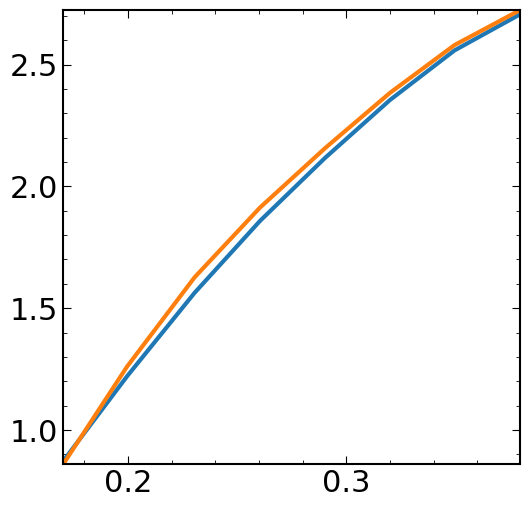

In [19]:
plt.plot(Trange, dfs[2].attrs['Ptot']/Trange**4)
plt.plot(Trange, dfs2[2].attrs['Ptot']/Trange**4)
# plt.plot(Trange, df_hi.attrs['Ptot']/Trange**4, ls='--')

In [20]:
erange_hi = dfs[0]['170'].attrs['erange']
erange_hi_2b = dfs[0]['170'].attrs['erange2b']

In [21]:
Tkey = '170'

(0.2, 0.5)

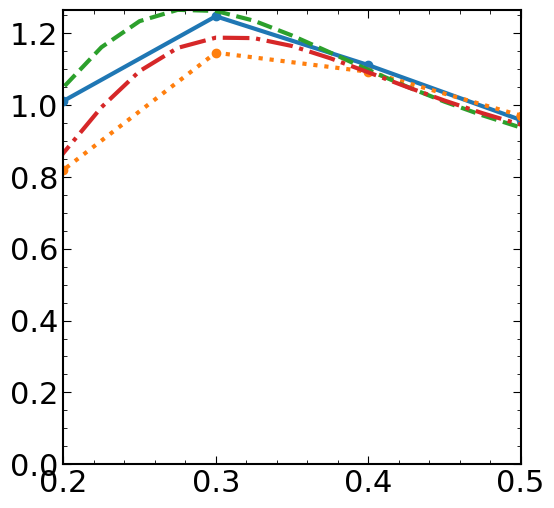

In [45]:
plt.plot(erange_hi, dfs[2][Tkey]['Q']['R'][:, 0], marker='o')
plt.plot(erange_hi, dfs[2][Tkey]['A']['R'][:, 0], ls=':', marker='o')
plt.plot(erange2, dfs2[2][Tkey]['Q']['R'][:, 0], ls='--')
plt.plot(erange2, dfs2[2][Tkey]['A']['R'][:, 0], ls='-.')

# plt.semilogy()

plt.xlim(0.2, 0.5)

In [ ]:
plt.plot(erange_hi, dfs[2][Tkey]['Q']['R'][:, 0])
plt.plot(erange_hi, dfs[2][Tkey]['A']['R'][:, 0], ls=':')
plt.plot(erange2, dfs2[2][Tkey]['Q']['R'][:, 0])
plt.plot(erange2, dfs2[2][Tkey]['A']['R'][:, 0], ls=':')

# plt.semilogy()

plt.xlim(0.2, 0.5)

## Compare the first iteration in two cases

In [104]:
i = 11
Tkey = '170'

In [105]:
iter1 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/0.40/{Tkey}/iter_{i}.hdf5')

In [106]:
iter1 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/{Tkey}/iter_{i}.hdf5')

In [107]:
iter2 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/0.00/{Tkey}/iter_{i}.hdf5')

[]

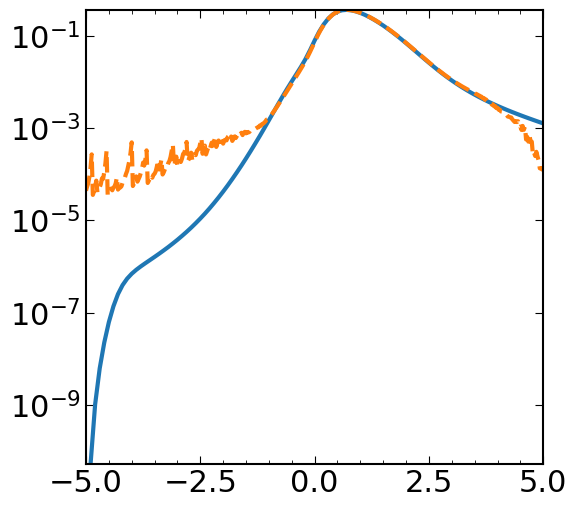

In [114]:
plt.plot(erange, -imag(iter1['Q']['S'][:, 0]))
plt.plot(erange2, -imag(iter2['Q']['S'][:, 0]), ls='--')

# plt.xlim(0, 1)

# plt.semilogy()

(0.0, 5.5)

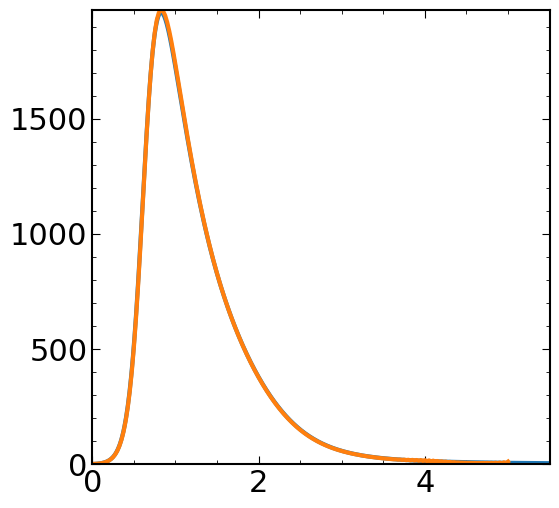

In [109]:
plt.plot(erange_hi_2b, -imag(iter1['TM']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(iter2['TM']['qa1']['0'][:, 0]))

plt.xlim(0, 5.5)

# plt.semilogy()

(0.0, 3.0)

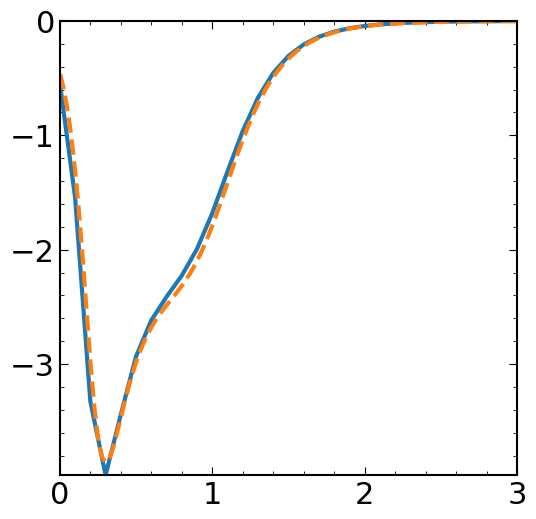

In [111]:
plt.plot(erange, imag(iter1['Q']['G'][:, 0]))
plt.plot(erange2, imag(iter2['Q']['G'][:, 0]), ls='--')

plt.xlim(0, 3)

## Compare the converged results